In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_wine

In [17]:
X , y = load_wine(return_X_y=True)

In [18]:
X.shape

(178, 13)

In [19]:
y.shape

(178,)

In [20]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [22]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y  , test_size=0.33  , random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()

In [26]:
X_train.ndim

2

In [27]:
X_train_scaled=scaler.fit_transform(X_train)

In [28]:
X_test_scaled=scaler.transform(X_test)

In [29]:
from sklearn.decomposition import PCA

In [53]:
pca=PCA(n_components=5)

In [54]:
pca.fit_transform(X_train)

array([[ 2.93369519e+02, -5.69083025e+00,  1.65610712e+00,
        -1.69464384e+00,  8.78547684e-02],
       [-3.26937012e+02, -1.44666879e+01,  3.46966781e-01,
         2.29108977e+00, -1.71400561e+00],
       [-3.13817263e+02, -9.84621739e+00,  5.36137503e+00,
        -7.08153006e-01,  7.64390647e-01],
       [-2.25875863e+01,  5.04616885e+01,  4.91348093e+00,
        -1.76224314e+00, -1.38572702e+00],
       [-5.68217819e+01, -1.16860078e+01, -1.27378622e+00,
         5.58239370e+00,  2.05236651e-01],
       [ 5.38199361e+02, -1.64540952e+01, -4.22947284e-01,
        -9.62981155e-01, -8.68748432e-01],
       [ 5.48230865e+02, -1.57094788e+01,  1.66030832e+00,
        -3.61274975e-01, -3.84097297e-01],
       [ 5.43173097e+02, -1.75600357e+01, -5.08839839e-01,
        -1.92716249e+00, -1.56135124e+00],
       [ 1.13613516e+02,  8.91918872e+00, -1.69711627e-01,
         3.47890032e+00, -1.25085289e+00],
       [-6.25649815e+00,  1.72961898e+01, -6.36085580e-01,
        -1.17718772e+00

In [55]:
pca.transform(X_test_scaled)

array([[-7.42979577e+02, -8.59674002e+01,  2.23511076e+01,
         1.33248485e+00, -3.10911121e+00],
       [-7.42225349e+02, -8.62914696e+01,  2.11790747e+01,
         1.60122416e+00, -3.56928638e+00],
       [-7.43824219e+02, -8.72454938e+01,  2.03278316e+01,
         1.75551998e+00, -6.57397355e+00],
       [-7.41571473e+02, -8.69116455e+01,  2.03683594e+01,
         6.92434629e-01, -2.20664436e+00],
       [-7.44134264e+02, -8.84406249e+01,  2.12554040e+01,
         5.59725411e-01, -4.33827377e+00],
       [-7.41558872e+02, -8.56785626e+01,  2.09589731e+01,
         1.40132333e+00, -2.60894964e+00],
       [-7.43951753e+02, -8.78709629e+01,  2.14911014e+01,
        -1.54237606e-01, -5.48625688e+00],
       [-7.43326357e+02, -8.68232045e+01,  1.95176285e+01,
         3.06726522e+00, -5.97041145e+00],
       [-7.43558983e+02, -8.73721762e+01,  2.13275990e+01,
        -7.32205791e-01, -3.10032211e+00],
       [-7.43242486e+02, -8.77276672e+01,  2.06009335e+01,
         2.23420319e+00

## Expalined Variance 

In [56]:
pca.explained_variance_ratio_

array([9.97776340e-01, 2.04102621e-03, 1.01662472e-04, 5.23163966e-05,
       1.20850212e-05])

In [57]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

In [58]:
explained_variance

array([0.99777634, 0.99981737, 0.99991903, 0.99997135, 0.99998343])

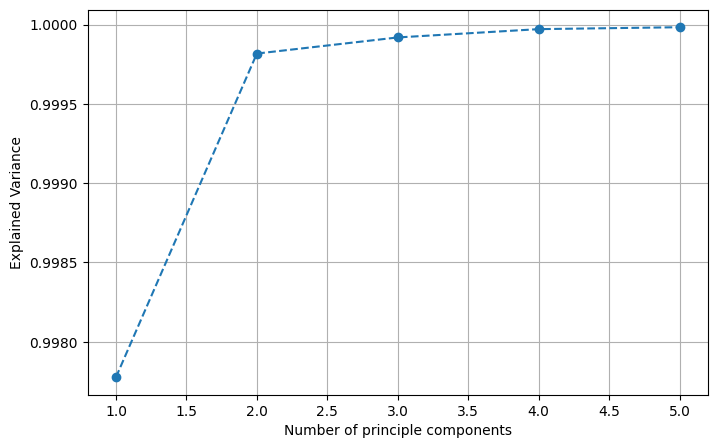

In [59]:
plt.figure(figsize=(8 , 5))
plt.plot(range(1 , len(explained_variance)+1) , explained_variance , marker='o' ,linestyle='--')
plt.xlabel('Number of principle components')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

In [60]:
pca=PCA(n_components=2)

In [63]:
x_train_pca_2d=pca.fit_transform(X_train_scaled)
x_test_pca_2d=pca.transform(X_test_scaled)

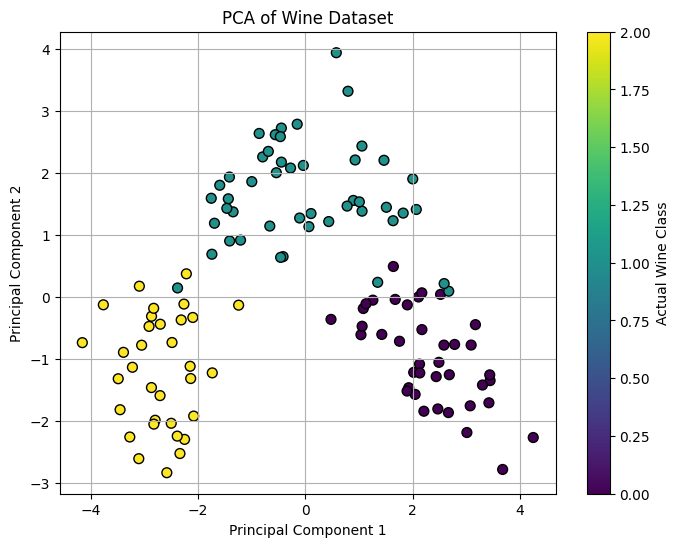

In [74]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca_2d[:, 0], x_train_pca_2d[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Actual Wine Class')
plt.grid(True)
plt.show()

The PCA scatter plot you're referring to shows how well PCA separates the wine classes (targets) in a 2D space based on the top 2 principal components.

Here’s how to interpret it:

🔍 Axes:
X-axis: Principal Component 1 — direction of maximum variance in the data.

Y-axis: Principal Component 2 — the second most significant variance direction, orthogonal to PC1.

🟢 Dots:
Each dot = one wine sample.

Color (c=y) = actual wine class (0, 1, or 2).

Different colors represent different actual target labels (i.e., types of wine).

📈 What you're looking for:
Cluster Separation:

If different-colored dots form separate, tight clusters, it means PCA is effectively capturing differences between wine classes.

It shows that just 2 components can already give good separation.

Overlap:

If some classes overlap, it means PCA in 2D isn't enough to fully separate those classes.

More components might be needed for better separation.

Variance Direction:

The spread along PC1 means most variance is captured in that direction.

PC2 captures additional structure not explained by PC1.

✅ Ideal Interpretation:
"The PCA scatter plot shows that wine samples from different classes tend to form distinct clusters in 2D space, especially between class 0 and the others. This indicates that PCA has successfully captured most of the class-separating information in just the first two components."

In [76]:
from sklearn.cluster import KMeans

In [77]:
kmeans=KMeans(n_clusters=3)

In [78]:
kmeans.fit(x_train_pca_2d)

C:\Users\Mohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [80]:
clusters=kmeans.predict(x_test_pca_2d)

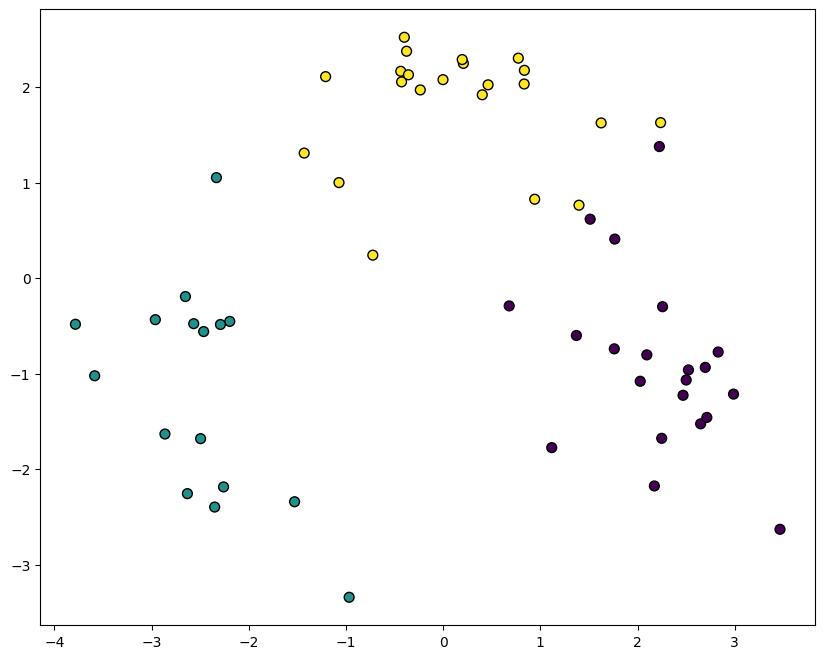

In [81]:
plt.figure(figsize=(10 , 8))
plt.scatter(x_test_pca_2d[: , 0] , x_test_pca_2d[: ,1] , c=clusters ,cmap='viridis', edgecolor='k', s=50 )

In [82]:
from sklearn.metrics import silhouette_score

In [83]:
silhouette_score(x_test_pca_2d , clusters)

0.5684445207453771